In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta, expon, poisson 

In [2]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

In [158]:
def show_chart(x, size, sn, a_lim, prob_limit, actual_prob, title):
    color_chart1 = '#387189'
    color_chart2 ="#a28b5c"
    legend_properties = {'weight':'bold'}
    plt.rcParams.update({
    #     "lines.color": "white",
    #     "patch.edgecolor": "white",
    #     "text.color": "black",
    #     "axes.facecolor": "white",
    #     "axes.edgecolor": "lightgray",
    #     "axes.labelcolor": "white",
    #     "xtick.color": "white",
    #     "ytick.color": "white",
    #     "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    for axn in [ax1, ax2]:
        axn.set_facecolor('#090809')
        axn.spines['bottom'].set_color('#376765')
        axn.spines['left'].set_color('#376765')
        axn.spines['right'].set_color('#376765')
        axn.spines['top'].set_color('#376765')
        axn.xaxis.label.set_color('#376765')
        axn.yaxis.label.set_color('#376765')
        axn.tick_params(axis='x', colors='#376765')
        axn.tick_params(axis='y', colors='#376765')
    N, bins, patches = ax1.hist(x, bins=50, label='data', color=color_chart1)
#     print(N, bins)
    # ax1.hist(x[x>a_lim], bins=50, label='data')
    max_hist = np.max(N)
    
    for _b, _p in zip(bins, patches):
        if _b >=a_lim:
            _p.set_color('#ca781b')

    ax1.vlines(sn  , 0, max_hist, colors="#6dd0d1", linestyles='dashed', label=r'$E[x]$')
    ax1.vlines(a_lim, 0, max_hist, colors="#8bf0aa",                     label=r'$\alpha$ level')
    legend = ax1.legend(loc='best')
    legend.get_frame().set_facecolor("#090809")
    legend.get_frame().set_facecolor("#090809")
    for text in legend.get_texts():
        text.set_color("#bfb6b8")
    ax1.set_title(title, color="#376765")

    if prob_limit >1:
        ax2.hlines(0, 0, prob_limit,  color='#376765')
    else:
        ax2.hlines(0, 0, 1,  color='#376765')
    ax2.vlines(1, -0.02, 0.02,  color='#376765')
    ax2.vlines(0, -0.02, 0.02,  color='#376765')


    bar_cntr =ax2.bar(prob_limit,       0.25, width=0.02, color='#d02818', label='M.I. Limit')
#     _blue  = bar_cntr[-1].get_facecolor()
    ax2.scatter(prob_limit, 0, color ='#d02717',s=50)

    bar_cntr = ax2.bar(actual_prob, 0.15, width=0.02, color='#ca781b', label='actual')
#     _blue  = bar_cntr[-1].get_facecolor()
    ax2.scatter(actual_prob, 0, color ='#ca781b', s=50)

    bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1}
    
    ax2.text(prob_limit, 0.3, str(prob_limit)[:5], bbox=dict(fill=False, edgecolor='#d02717', linewidth=0), color="#bfb6b8", ha='center', va='center')
    ax2.text(actual_prob, 0.2, str(actual_prob)[:5], bbox=dict(fill=False, edgecolor='#d02717', linewidth=0), color="#bfb6b8", ha='center', va='center')
    ax2.text(-0.015, -0.1, '0', bbox=dict(fill=False, edgecolor='#d02717', linewidth=0), color="#bfb6b8")
    ax2.text(0.98, -0.1, '1', bbox=dict(fill=False, edgecolor='#d02717', linewidth=0), color="#bfb6b8")

    ax2.set_title('Boundary comparison', color="#376765")
    ax2.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.set_ylim(-1,1)
    legend = ax2.legend(loc='best')
    legend.get_frame().set_facecolor("#090809")
    legend.get_frame().set_facecolor("#090809")
    for text in legend.get_texts():
        text.set_color("#bfb6b8")
        
    # plt.title('asd')
    plt.tight_layout()
    plt.show()

In [159]:
def show_MI_beta(a,b,size, a_lim):

    # data
    x = beta.rvs(a, b, size=(size,))
    
    mean, var, skew, kurt = beta.stats(a,b , moments='mvsk')
    

    # a > 0
    prob_limit = mean/a_lim

    # actual probability
    actual_prob = np.sum(x>a_lim)/size
    title = f'beta distribution a= {a} b={b}'
    show_chart(x, size, mean, a_lim, prob_limit, actual_prob, title)

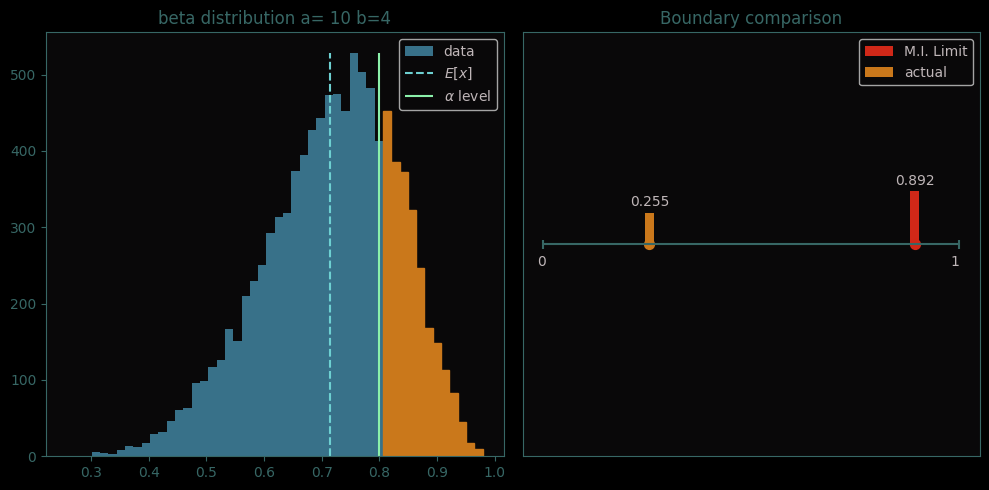

In [160]:
show_MI_beta(a = 10,b =4,size = 10000,a_lim = 0.8)

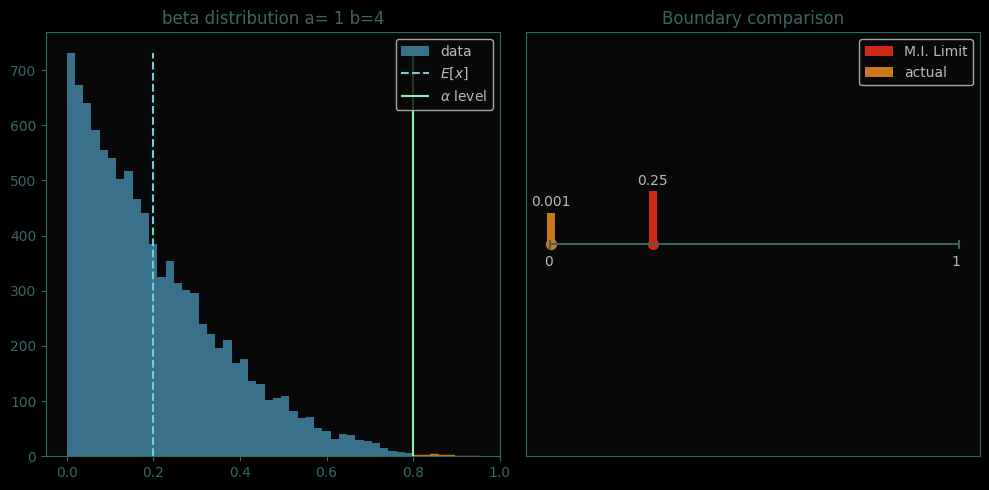

In [161]:
show_MI_beta(a = 1,b =4,size = 10000,a_lim = 0.8)

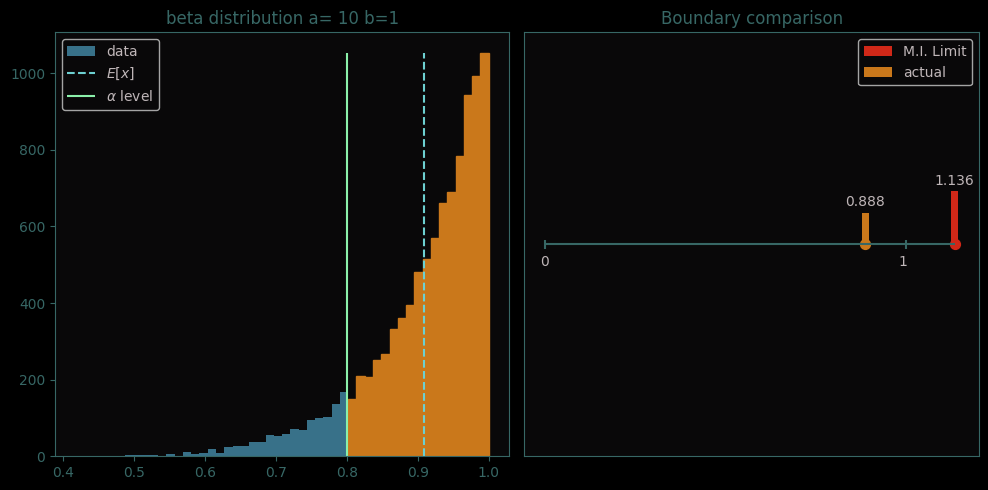

In [162]:
show_MI_beta(a = 10,b =1,size = 10000, a_lim = 0.8)

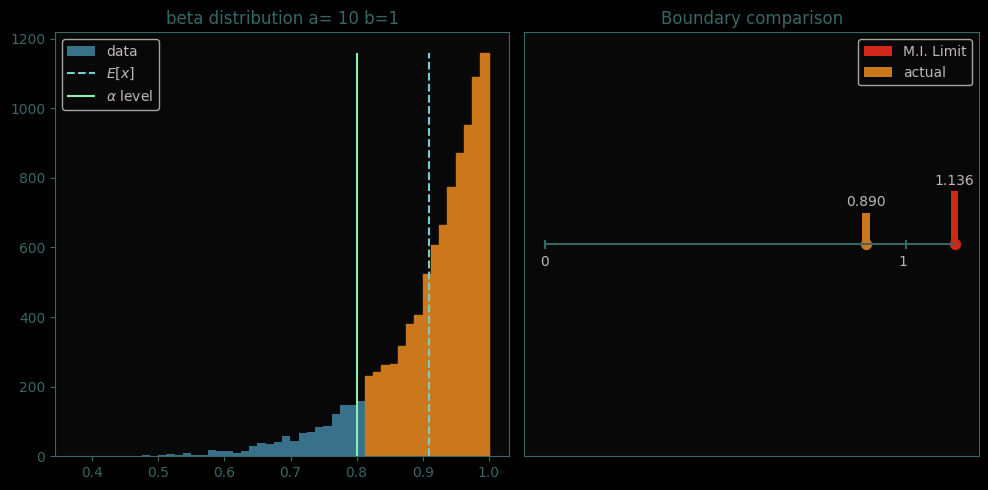

In [163]:
show_MI_beta(a = 10,b =1,size = 10000, a_lim = 0.8)

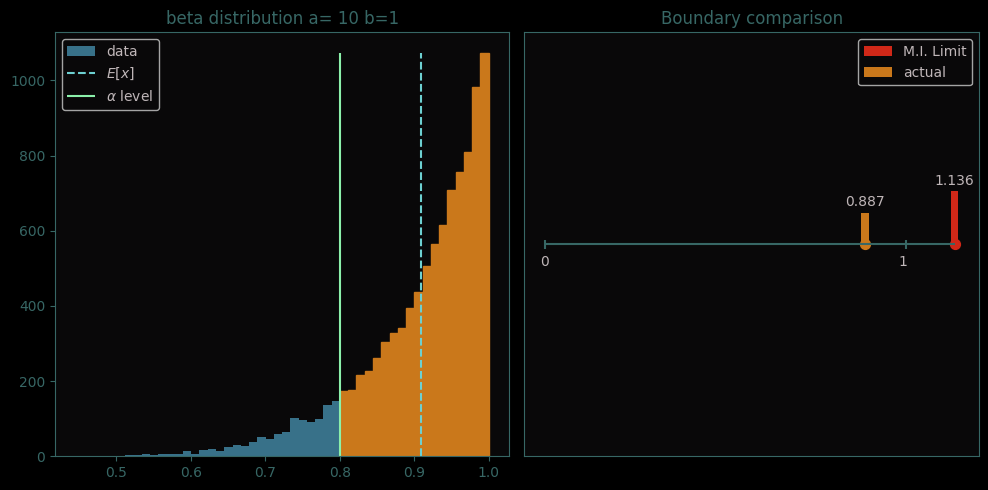

In [164]:
show_MI_beta(a = 10,b =1,size = 10000, a_lim = 0.8)

In [165]:
def show_MI_exp(p,size, a_lim):
    # data
    x = expon.rvs(scale=p,size=(size,))
    mean, var, skew, kurt = expon.stats(p, moments='mvsk')
    print('m',mean,'; var=', var, '; skew=', skew,'; kurt=', kurt)

    # a > 0
    prob_limit = mean/a_lim

    # actual probability
    actual_prob = np.sum(x>a_lim)/size
    title = f'Exp distribution $\lambda$={p}'
    show_chart(x, size, mean, a_lim, prob_limit, actual_prob, title)

m 3.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


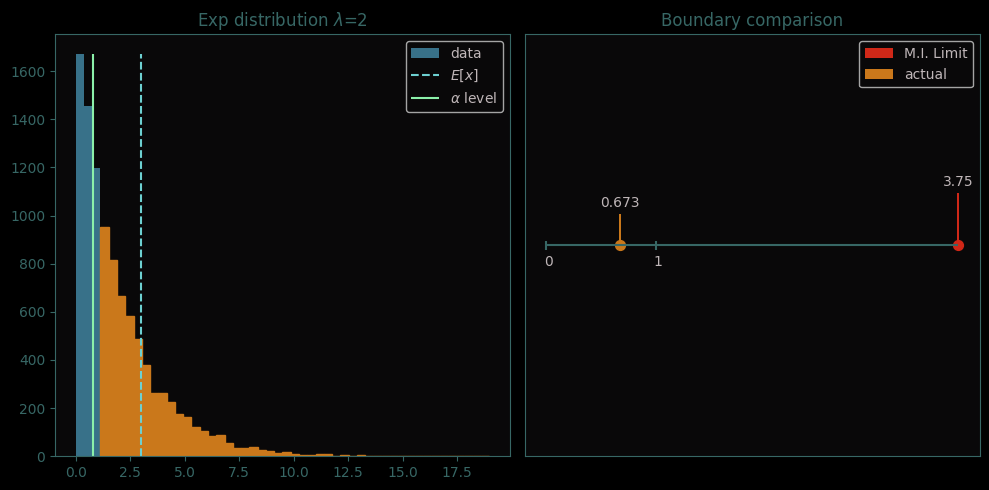

In [166]:
show_MI_exp(2,size = 10000, a_lim = 0.8)

m 2.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


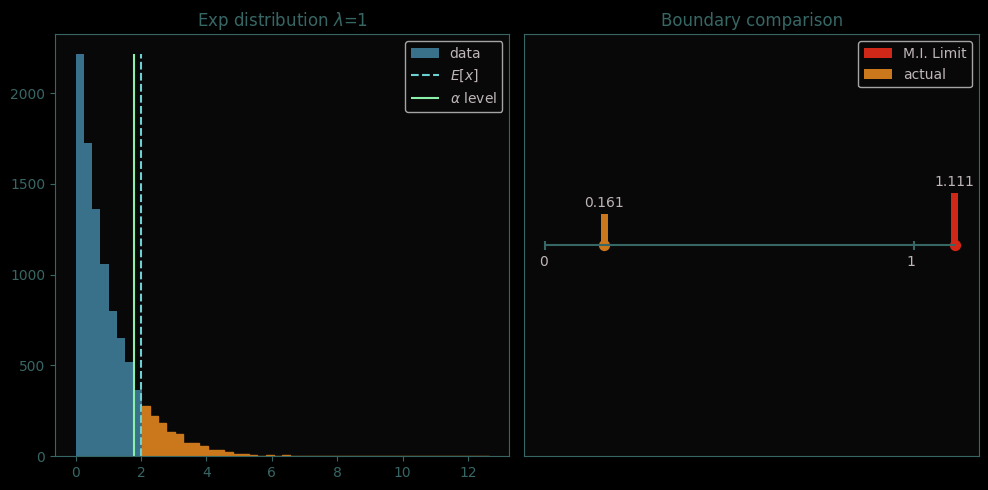

In [167]:
show_MI_exp(1,size = 10000, a_lim = 1.8)

m 3.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


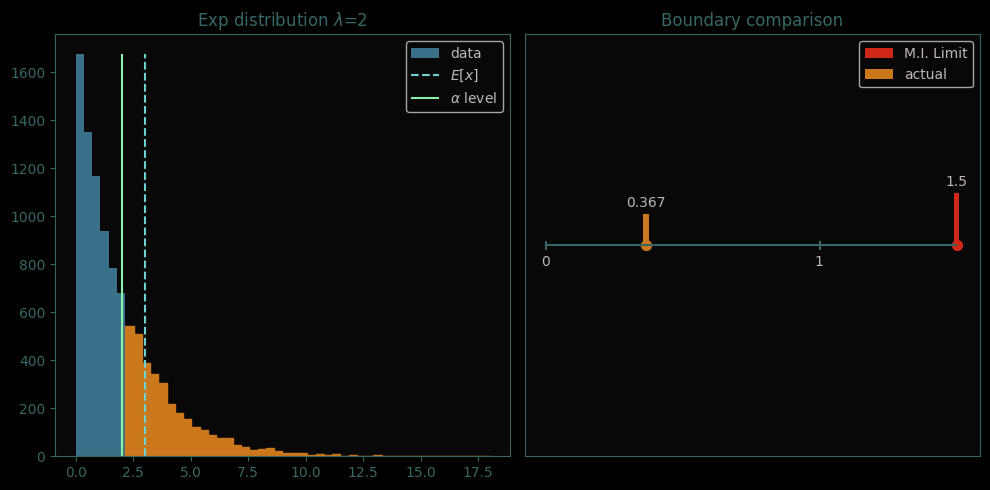

In [168]:
show_MI_exp(2,size = 10000, a_lim = 2)

m 11.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


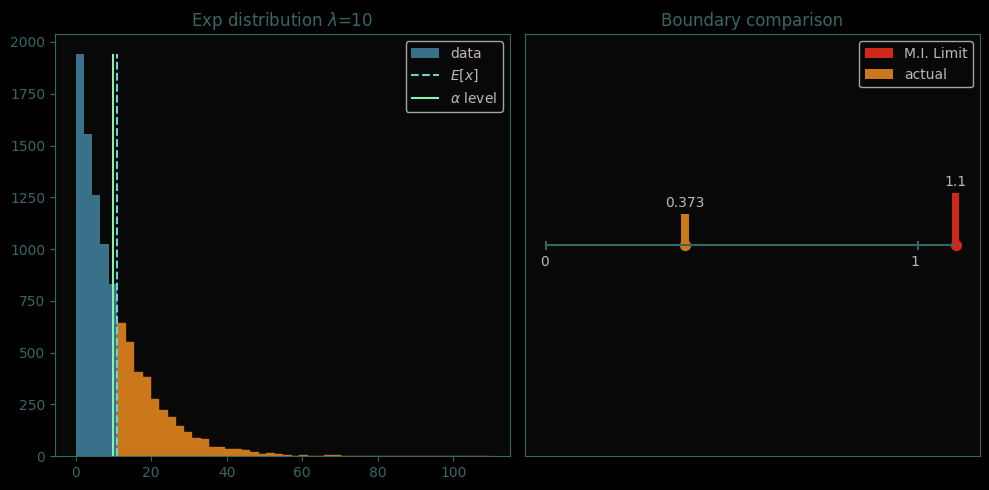

In [169]:
show_MI_exp(10,size = 10000, a_lim = 10)

m 11.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


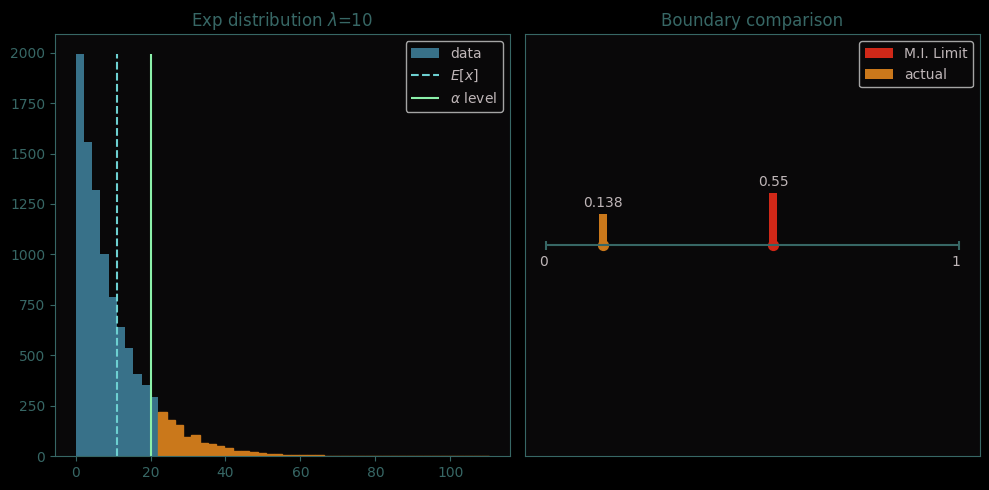

In [170]:
show_MI_exp(10,size = 10000, a_lim = 20)

m 11.0 ; var= 1.0 ; skew= 2.0 ; kurt= 6.0


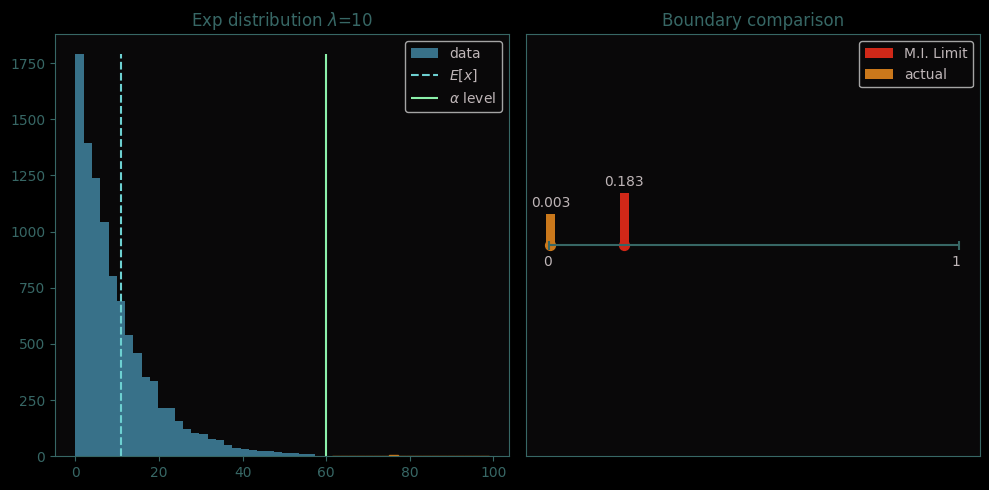

In [171]:
show_MI_exp(10,size = 10000, a_lim = 60)

In [172]:
def show_MI_poisson(p,size, a_lim):

    # data
    x = poisson.rvs(p,size=(size,))
    mean, var, skew, kurt = poisson.stats(p, moments='mvsk')
    print('m',mean,'; var=', var, '; skew=', skew,'; kurt=', kurt)
    # a > 0
    prob_limit = mean/a_lim

    # actual probability
    actual_prob = np.sum(x>a_lim)/size
    title = f'Poisson distribution $\mu$={p}'
    show_chart(x, size, mean, a_lim, prob_limit, actual_prob, title)

    

m 0.1 ; var= 0.1 ; skew= 3.1622776601683795 ; kurt= 10.0


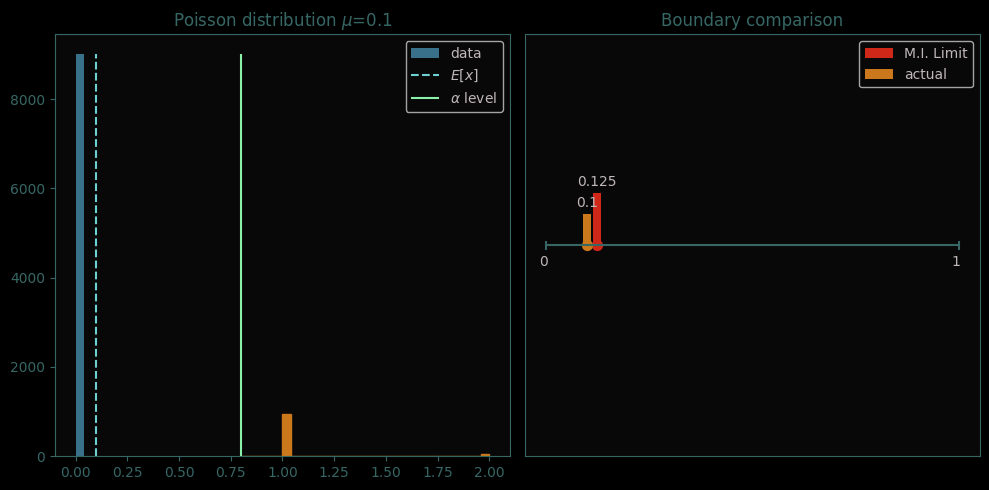

In [173]:
show_MI_poisson(0.1,size = 10000, a_lim = 0.8)

m 1.0 ; var= 1.0 ; skew= 1.0 ; kurt= 1.0


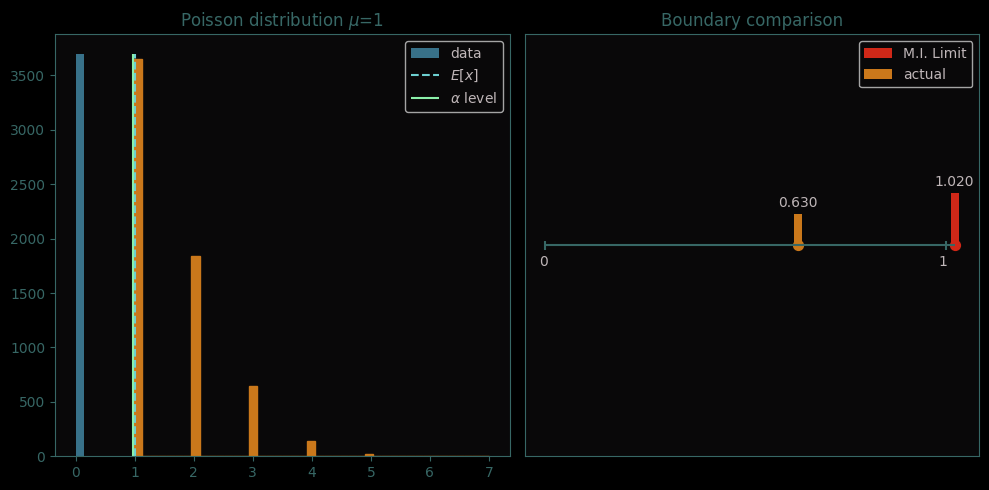

In [174]:
show_MI_poisson(1,size = 10000, a_lim = 0.98)

m 2.0 ; var= 2.0 ; skew= 0.7071067811865476 ; kurt= 0.5


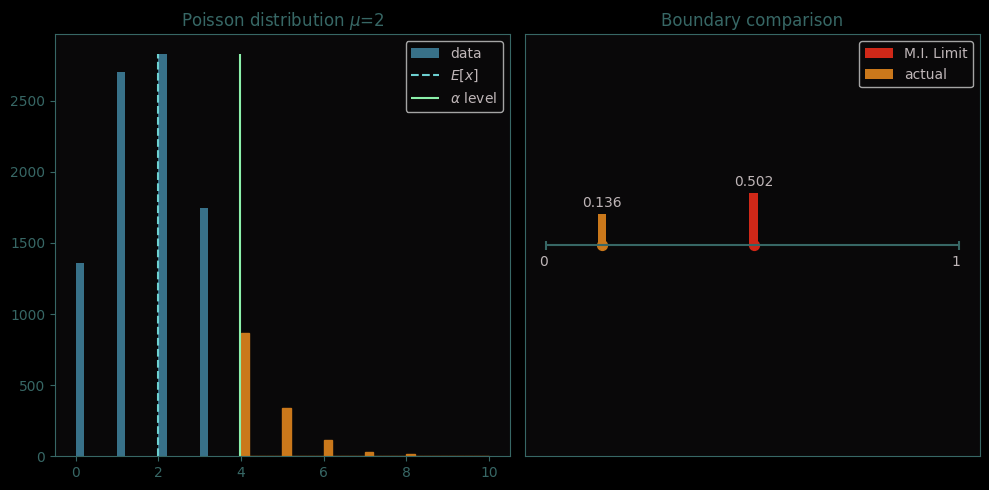

In [175]:
show_MI_poisson(2,size = 10000, a_lim = 3.98)

m 10.0 ; var= 10.0 ; skew= 0.31622776601683794 ; kurt= 0.1


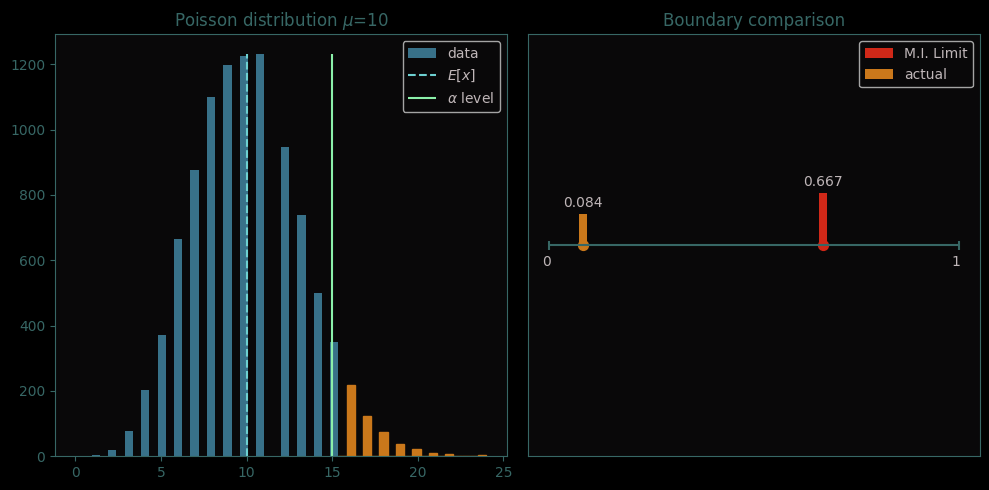

In [176]:
show_MI_poisson(10,size = 10000, a_lim =14.98)